In [2]:
import torch
import numpy as np
import torchvision.models as models
import matplotlib.pyplot as plt
import pickle
from torchinfo import summary

In [4]:
vgg16 = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/christianwilliams/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Let us look at AlexNet.

In [5]:
vgg16
summary(vgg16)

Layer (type:depth-idx)                   Param #
VGG                                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       1,792
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       36,928
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
│    └─Conv2d: 2-6                       73,856
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       147,584
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
│    └─Conv2d: 2-11                      295,168
│    └─ReLU: 2-12                        --
│    └─Conv2d: 2-13                      590,080
│    └─ReLU: 2-14                        --
│    └─Conv2d: 2-15                      590,080
│    └─ReLU: 2-16                        --
│    └─MaxPool2d: 2-17                   --
│    └─Conv2d: 2-18                      1,180,160
│    └─ReLU: 2-19                

In [4]:
aln_lin_1 = vgg16.classifier[0].weight[:].detach().numpy()
print("aln_lin_1", aln_lin_1.shape)
aln_lin_2 = vgg16.classifier[3].weight[:].detach().numpy()
print("aln_lin_2", aln_lin_2.shape)
aln_lin_3 = vgg16.classifier[6].weight[:].detach().numpy()
print("aln_lin_3", aln_lin_3.shape)


aln_lin_1 (4096, 25088)
aln_lin_2 (4096, 4096)
aln_lin_3 (1000, 4096)


In [5]:
from analyze_model import Plot2DMatrix, PlotVectorSizes

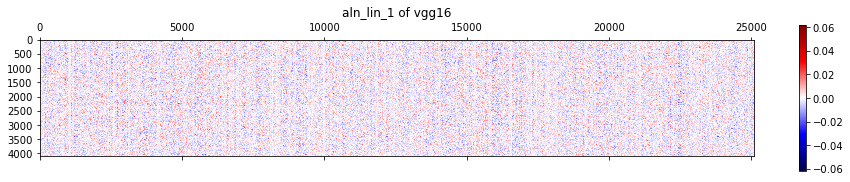

100%|██████████| 4096/4096 [03:32<00:00, 19.29it/s]


There are totally 0 zero elements in this matrix, percentage is 0.0


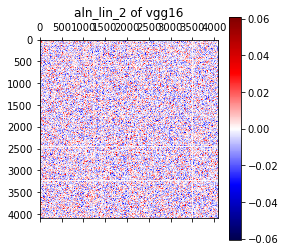

100%|██████████| 4096/4096 [00:34<00:00, 117.50it/s]


There are totally 0 zero elements in this matrix, percentage is 0.0


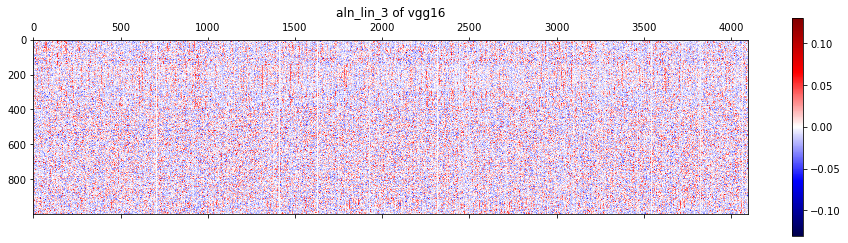

100%|██████████| 1000/1000 [00:08<00:00, 117.34it/s]

There are totally 0 zero elements in this matrix, percentage is 0.0


In [6]:
Plot2DMatrix(aln_lin_1, "aln_lin_1 of vgg16", color_map="seismic")
Plot2DMatrix(aln_lin_2, "aln_lin_2 of vgg16", color_map="seismic")
Plot2DMatrix(aln_lin_3, "aln_lin_3 of vgg16", color_map="seismic")

Now, let us do some pruning on the fully connected layer.

In [7]:
import torch.nn.utils.prune as prune

## global pruning
parameters_to_prune = (
    (vgg16.classifier[0], 'weight'),
    (vgg16.classifier[3], 'weight'),
    (vgg16.classifier[6], 'weight'),
)

prune.global_unstructured(
    parameters_to_prune,
    pruning_method=prune.L1Unstructured,
    amount=0.8,
)

print(
    "Sparsity in fullyconnected_1.weight: {:.2f}%".format(
        100. * float(torch.sum(vgg16.classifier[0].weight == 0))
        / float(vgg16.classifier[0].weight.nelement())
    )
)
print(
    "Sparsity in fullyconnected_2.weight: {:.2f}%".format(
        100. * float(torch.sum(vgg16.classifier[3].weight == 0))
        / float(vgg16.classifier[3].weight.nelement())
    )
)
print(
    "Sparsity in fullyconnected_3.weight: {:.2f}%".format(
        100. * float(torch.sum(vgg16.classifier[6].weight == 0))
        / float(vgg16.classifier[6].weight.nelement())
    )
)

Sparsity in fullyconnected_1.weight: 86.16%
Sparsity in fullyconnected_2.weight: 54.25%
Sparsity in fullyconnected_3.weight: 30.91%


In [8]:
compressed_aln_lin_1 = vgg16.classifier[0].weight[:].detach().numpy()
print("compressed_aln_lin_1", compressed_aln_lin_1.shape)
compressed_aln_lin_2 = vgg16.classifier[3].weight[:].detach().numpy()
print("compressed_aln_lin_2", compressed_aln_lin_2.shape)
compressed_aln_lin_3 = vgg16.classifier[6].weight[:].detach().numpy()
print("compressed_aln_lin_3", compressed_aln_lin_3.shape)

compressed_aln_lin_1 (4096, 25088)
compressed_aln_lin_2 (4096, 4096)
compressed_aln_lin_3 (1000, 4096)


100%|██████████| 1000/1000 [00:08<00:00, 115.95it/s]


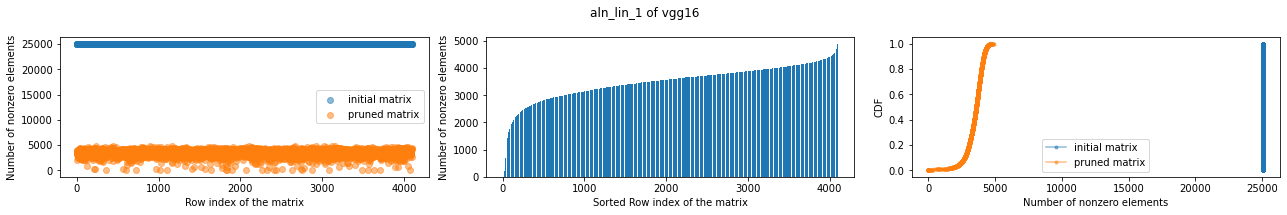

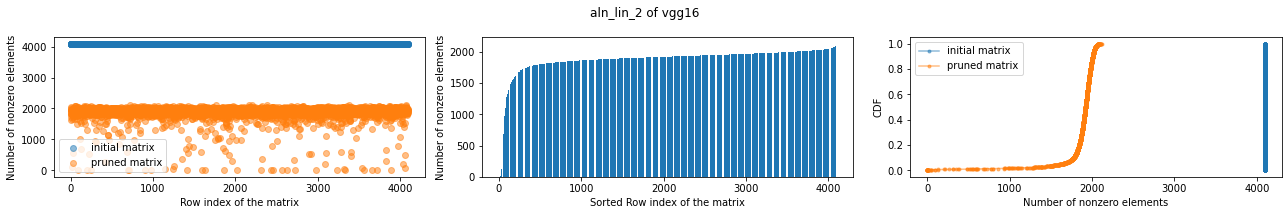

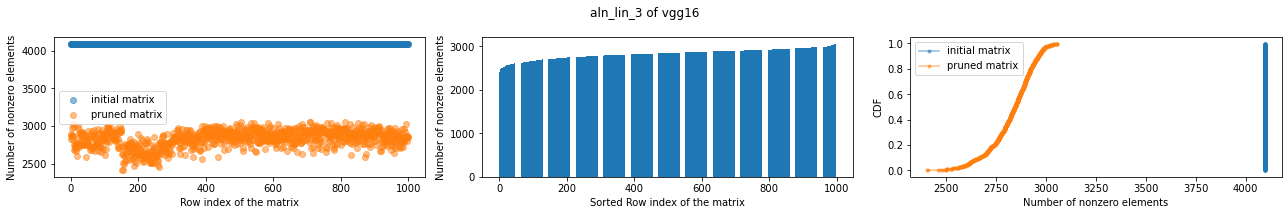

In [9]:
PlotVectorSizes(aln_lin_1, compressed_aln_lin_1, "aln_lin_1 of vgg16", plot_two_matrces=True)
PlotVectorSizes(aln_lin_2, compressed_aln_lin_2, "aln_lin_2 of vgg16", plot_two_matrces=True)
PlotVectorSizes(aln_lin_3, compressed_aln_lin_3, "aln_lin_3 of vgg16", plot_two_matrces=True)

In [10]:
pickle.dump(aln_lin_1, open("../../data/saved_models/vgg16/aln_lin_1.p", "wb" ))
pickle.dump(aln_lin_2, open("../../data/saved_models/vgg16/aln_lin_2.p", "wb" ))
pickle.dump(aln_lin_3, open("../../data/saved_models/vgg16/aln_lin_3.p", "wb" ))
pickle.dump(compressed_aln_lin_1, open("../../data/saved_models/vgg16/compressed_80_aln_lin_1.p", "wb" ))
pickle.dump(compressed_aln_lin_2, open("../../data/saved_models/vgg16/compressed_80_aln_lin_2.p", "wb" ))
pickle.dump(compressed_aln_lin_3, open("../../data/saved_models/vgg16/compressed_80_aln_lin_3.p", "wb" ))
print("model saved in pickle files")

model saved in pickle files
